In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
plt.style.use(['default'])

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 정상 data와 1,3,6,7 클래스에 속하는 data 가져와서 test set에 포함시키기
test_data  = ['0/WELL-00001_20170219120021.csv',
             '0/WELL-00001_20170202030343.csv',
             '0/WELL-00001_20170826180000.csv',
             '0/WELL-00002_20170218010237.csv',
             '0/WELL-00002_20170616050043.csv',
             '0/WELL-00006_20170209150146.csv',
             '0/WELL-00006_20170509150042.csv',
             '0/WELL-00006_20170828040343.csv',
             '0/WELL-00005_20170331160000.csv',
             '0/WELL-00005_20170830180000.csv',
             '1/WELL-00002_20140126161944.csv',
             '3/WELL-00001_20170320130025.csv',
             '6/WELL-00004_20171031181509.csv',
             '7/WELL-00018_20180611021218.csv'
]

In [ ]:
# 테스트 데이터셋 모두 데이터프레임으로 변환 후 리스트에 담기
test_list=[]
for i in test_data:
  d = pd.read_csv('https://raw.githubusercontent.com/petrobras/3W/main/dataset/'+i)
  test_list.append(d)

# 3번 이상 전처리

In [ ]:
# 이상 클래스 3번 데이터셋의 주소
linklist=[
'WELL-00014_20170917150000.csv',
'WELL-00014_20170917200000.csv',
'WELL-00014_20170918020114.csv',
'WELL-00014_20170918070135.csv',
'WELL-00014_20170918120103.csv',
'WELL-00014_20170919210016.csv',
'WELL-00014_20170920010042.csv',
'WELL-00014_20170920060228.csv',
'WELL-00014_20170920110053.csv',
'WELL-00014_20170920190207.csv',
'WELL-00014_20170921000053.csv',
'WELL-00014_20170921050404.csv',
'WELL-00014_20170921100155.csv',
'WELL-00014_20170921150042.csv',
'WELL-00014_20170921200114.csv',
'WELL-00014_20170922010042.csv',
'WELL-00014_20170922060124.csv',
'WELL-00014_20170922110042.csv',
'WELL-00014_20170922160249.csv',
'WELL-00014_20170925010031.csv',
'WELL-00014_20170925060042.csv',
'WELL-00014_20170925110124.csv',
'WELL-00014_20170925160218.csv',
'WELL-00014_20170925210042.csv',
'WELL-00014_20170926020340.csv',
'WELL-00014_20170926070042.csv',
'WELL-00014_20170926120103.csv',
'WELL-00014_20170926170228.csv',
'WELL-00014_20171028080000.csv',
'WELL-00014_20171028130000.csv',
'WELL-00014_20171028180038.csv',
'SIMULATED_00001.csv',
'SIMULATED_00002.csv',
'SIMULATED_00003.csv',
'SIMULATED_00004.csv',
'SIMULATED_00005.csv',
'SIMULATED_00006.csv',
'SIMULATED_00007.csv',
'SIMULATED_00008.csv',
'SIMULATED_00009.csv',
'SIMULATED_00010.csv',
'SIMULATED_00011.csv',
'SIMULATED_00012.csv',
'SIMULATED_00013.csv',
'SIMULATED_00014.csv',
'SIMULATED_00015.csv',
'SIMULATED_00016.csv',
'SIMULATED_00017.csv',
'SIMULATED_00018.csv',
'SIMULATED_00019.csv',
'SIMULATED_00020.csv',
'SIMULATED_00021.csv',
'SIMULATED_00022.csv',
'SIMULATED_00023.csv',
'SIMULATED_00024.csv',
'SIMULATED_00025.csv',
'SIMULATED_00026.csv',
'SIMULATED_00027.csv',
'SIMULATED_00028.csv',
'SIMULATED_00029.csv',
'SIMULATED_00030.csv',
'SIMULATED_00031.csv',
'SIMULATED_00032.csv',
'SIMULATED_00033.csv',
'SIMULATED_00034.csv',
'SIMULATED_00035.csv',
'SIMULATED_00036.csv',
'SIMULATED_00037.csv',
'SIMULATED_00038.csv',
'SIMULATED_00039.csv',
'SIMULATED_00040.csv',
'SIMULATED_00041.csv',
'SIMULATED_00042.csv',
'SIMULATED_00043.csv',
'SIMULATED_00044.csv',
'SIMULATED_00045.csv',
'SIMULATED_00046.csv',
'SIMULATED_00047.csv',
'SIMULATED_00048.csv',
'SIMULATED_00049.csv',
'SIMULATED_00050.csv',
'SIMULATED_00051.csv',
'SIMULATED_00052.csv',
'SIMULATED_00053.csv',
'SIMULATED_00054.csv',
'SIMULATED_00055.csv',
'SIMULATED_00056.csv',
'SIMULATED_00057.csv',
'SIMULATED_00058.csv',
'SIMULATED_00059.csv',
'SIMULATED_00060.csv',
'SIMULATED_00061.csv',
'SIMULATED_00062.csv',
'SIMULATED_00063.csv',
'SIMULATED_00064.csv',
'SIMULATED_00065.csv',
'SIMULATED_00066.csv',
'SIMULATED_00067.csv',
'SIMULATED_00068.csv',
'SIMULATED_00069.csv',
'SIMULATED_00070.csv',
'SIMULATED_00071.csv',
'SIMULATED_00072.csv',
'SIMULATED_00073.csv',
'SIMULATED_00074.csv']

In [ ]:
#데이터셋 모두 데이터프레임으로 변환 후 리스트에 담기
dflist=[]
for i in linklist:
  d = pd.read_csv('https://raw.githubusercontent.com/petrobras/3W/main/dataset/3/'+i)
  dflist.append(d)

In [ ]:
def dflist_to_df(dflist):
  #데이터프레임 처리: column은 필요한 4개만 남기고, 데이터셋 하나당 10000개씩 3번 묶어서 자른다.
  for i in range(len(dflist)):
    df=dflist[i].iloc[:, 2:6].dropna()
    ld=len(df)
    ld2=round((10000+ld)/2)

    n1 = pd.DataFrame(np.array(df.iloc[:10000]).flatten()).T
    n2 = pd.DataFrame(np.array(df.iloc[ld2-10000:ld2]).flatten()).T
    n3 = pd.DataFrame(np.array(df.iloc[ld-10000:ld]).flatten()).T

    df_add = pd.concat([n1,n2,n3]).reset_index(drop=True)
    if i<1:
      df_new = df_add
    else:
      df_new = pd.concat([df_new, df_add]).reset_index(drop=True)

  return df_new

In [ ]:
df_train = dflist_to_df(dflist)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,39950,39951,39952,39953,39954,39955,39956,39957,39958,39959,39960,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,13445530.0,57.04935,2210575.0,37.78826,13445580.0,57.04918,2211325.0,37.78814,13445620.0,57.04901,2212075.0,37.78801,13445670.0,57.04884,2212825.0,37.78788,13445310.0,57.04804,2213575.0,37.78776,13444940.0,57.04724,2214325.0,37.78763,13444600.0,57.04678,2215075.0,37.78751,13444250.0,57.04631,2215825.0,37.78738,13444890.0,57.04623,2216734.0,37.78725,13445520.0,57.04615,2217643.0,37.78713,13444910.0,57.04587,2218552.0,37.78700,13444300.0,57.04558,2219461.0,37.78688,13444600.0,57.04523,...,2305446.0,37.75167,13514810.0,56.81948,2307340.0,37.75116,13514690.0,56.82137,2309234.0,37.75065,13514000.0,56.82208,2311128.0,37.75014,13513300.0,56.82279,2313022.0,37.74964,13513360.0,56.82333,2314916.0,37.74913,13513420.0,56.82388,2316810.0,37.74862,13513280.0,56.82441,2318704.0,37.74812,13513150.0,56.82494,2320597.0,37.74761,13513110.0,56.82530,2322491.0,37.74710,13513070.0,56.82566,2323401.0,37.74659,13512970.0,56.82621,2324310.0,37.74609,13512880.0,56.82675,2325219.0,37.74558
1,13669780.0,56.72512,2177492.0,37.86484,13669710.0,56.72543,2176507.0,37.86469,13669630.0,56.72574,2175522.0,37.86453,13669550.0,56.72605,2174537.0,37.86437,13669470.0,56.72636,2173552.0,37.86422,13669490.0,56.72694,2172567.0,37.86406,13669500.0,56.72752,2171583.0,37.86390,13669400.0,56.72766,2170598.0,37.86374,13669310.0,56.72780,2169613.0,37.86359,13669220.0,56.72793,2168628.0,37.86343,13669120.0,56.72807,2167643.0,37.86327,13668810.0,56.72821,2166658.0,37.86312,13668500.0,56.72835,...,1967113.0,37.62160,13606310.0,56.82316,1966658.0,37.62242,13607040.0,56.82334,1967871.0,37.62324,13607770.0,56.82352,1969083.0,37.62406,13608500.0,56.82370,1970295.0,37.62488,13609230.0,56.82388,1971507.0,37.62570,13609320.0,56.82397,1972719.0,37.62652,13609400.0,56.82406,1973931.0,37.62735,13609750.0,56.82428,1975143.0,37.62817,13610100.0,56.82450,1976355.0,37.62899,13610460.0,56.82472,1977568.0,37.62981,13610810.0,56.82494,1978780.0,37.63063,13611510.0,56.82485,1979992.0,37.63145
2,13598500.0,56.79195,2005825.0,37.63992,13598860.0,56.79163,2005825.0,37.64092,13599120.0,56.79124,2005825.0,37.64192,13599370.0,56.79085,2005825.0,37.64292,13599540.0,56.79067,2006810.0,37.64391,13599710.0,56.79049,2007795.0,37.64491,13599890.0,56.79031,2008780.0,37.64591,13600060.0,56.79013,2009765.0,37.64691,13600240.0,56.78967,2010749.0,37.64790,13600420.0,56.78922,2011734.0,37.64890,13600600.0,56.78889,2012719.0,37.64990,13600790.0,56.78857,2013704.0,37.65089,13600890.0,56.78809,...,1885219.0,38.28534,13952480.0,56.54538,1886280.0,38.28600,13952550.0,56.54529,1887340.0,38.28667,13953150.0,56.54524,1888401.0,38.28733,13953750.0,56.54519,1889462.0,38.28800,13954170.0,56.54510,1890522.0,38.28867,13954600.0,56.54501,1891583.0,38.28933,13954790.0,56.54497,1892643.0,38.29000,13954990.0,56.54493,1893704.0,38.29067,13955230.0,56.54481,1894765.0,38.29134,13955470.0,56.54469,1895825.0,38.29200,13955710.0,56.54458,1896431.0,38.29267,13955950.0,56.54446,1897037.0,38.29333
3,13962440.0,56.50709,1944310.0,38.33400,13961960.0,56.50718,1944689.0,38.33402,13961980.0,56.50709,1945068.0,38.33404,13962000.0,56.50700,1945446.0,38.33407,13962270.0,56.50690,1945825.0,38.33409,13962540.0,56.50682,1946052.0,38.33411,13962430.0,56.50673,1946280.0,38.33414,13962310.0,56.50663,1946507.0,38.33416,13961980.0,56.50645,1946734.0,38.33418,13961650.0,56.50627,1946962.0,38.33421,13961700.0,56.50614,1947189.0,38.33423,13961750.0,56.50601,1947416.0,38.33426,13961800.0,56.50588,...,1966128.0,38.22789,14137210.0,56.10524,1967568.0,38.22733,14136390.0,56.10488,1969007.0,38.22677,14136100.0,56.10461,1

In [ ]:
df_train = df_train.sample(frac=1).reset_index(drop=True)   # row shuffle

여기 10000 이하인거 빼는 함수

In [ ]:
L=[]
delete_model = []
def drop_less_10000(dflist):
  for i in range(len(dflist)):
    if (len(dflist[i].iloc[:, 2].dropna())<10000) or (len(dflist[i].iloc[:, 3].dropna())<10000) or (len(dflist[i].iloc[:, 4].dropna())<10000) or (len(dflist[i].iloc[:, 5].dropna())<10000):
      L.append(i)

  for i in L:
    delete_model.append(dflist[i])
    del dflist[i]

  return dflist

In [ ]:
def dflist_to_df_once(dflist):
  #맨 앞 10000초로 '한 번만' 자르기
  for i in range(len(dflist)):
    df=dflist[i].iloc[:, 2:6].dropna()
    ld=len(df)
    ld2=round((10000+ld)/2)

    n1 = pd.DataFrame(np.array(df.iloc[:10000]).flatten()).T
    if i<1:
      df_new = n1
    else:
      df_new = pd.concat([df_new, n1]).reset_index(drop=True)

  return df_new

In [ ]:
testlist = drop_less_10000(test_list)
df_test = dflist_to_df_once(testlist)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,39950,39951,39952,39953,39954,39955,39956,39957,39958,39959,39960,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,13884900.0,117.7054,5799009.0,70.23315,13884900.0,117.7052,5800082.0,70.23226,13884900.0,117.7050,5801154.0,70.23138,13884900.0,117.7048,5802227.0,70.23049,13884900.0,117.7046,5803300.0,70.22961,13884900.0,117.7044,5804374.0,70.22872,13884900.0,117.7042,5805446.0,70.22784,13884900.0,117.7040,5806519.0,70.22694,13884900.0,117.7038,5807592.0,70.22606,13884900.0,117.7036,5808665.0,70.22517,13884900.0,117.7034,5809738.0,70.22429,13884900.0,117.7032,5810811.0,70.22340,13884900.0,117.7031,...,5857769.0,69.96027,13877630.0,117.6914,5857181.0,69.95938,13877670.0,117.6913,5856593.0,69.95850,13877710.0,117.6913,5856004.0,69.95760,13877750.0,117.6912,5855415.0,69.95671,13877790.0,117.6912,5854827.0,69.95582,13877830.0,117.6911,5854239.0,69.95493,13877870.0,117.6910,5853650.0,69.95404,13877910.0,117.6910,5853061.0,69.95315,13877960.0,117.6909,5852473.0,69.95226,13878000.0,117.6908,5851884.0,69.95461,13878040.0,117.6908,5851296.0,69.95696,13878080.0,117.6907,5850707.0,69.95931
1,9914938.0,118.7874,1432759.0,83.17275,9914938.0,118.7874,1421402.0,83.17943,9914938.0,118.7874,1427637.0,83.18610,9914938.0,118.7874,1433872.0,83.19279,9914938.0,118.7874,1440106.0,83.19946,9914938.0,118.7873,1446341.0,83.20615,9914938.0,118.7873,1452576.0,83.21282,9914938.0,118.7873,1458811.0,83.21950,9914938.0,118.7873,1465045.0,83.22618,9914938.0,118.7873,1471280.0,83.23286,9914938.0,118.7872,1477515.0,83.23953,9914938.0,118.7872,1483749.0,83.24622,9914938.0,118.7872,...,1416701.0,83.79895,9894989.0,118.7858,1463357.0,83.80072,9894989.0,118.7858,1510014.0,83.80249,9894989.0,118.7858,1556671.0,83.80427,9894989.0,118.7858,1568338.0,83.80604,9894989.0,118.7858,1580005.0,83.80781,9894989.0,118.7858,1591672.0,83.80959,9894989.0,118.7858,1603339.0,83.81136,9894989.0,118.7858,1615006.0,83.81313,9894989.0,118.7858,1626673.0,83.81490,9894989.0,118.7858,1638340.0,83.81667,9894989.0,118.7858,1650008.0,83.81844,9894989.0,118.7858,1661675.0,83.82021
2,9649126.0,118.4859,1791237.0,83.38650,9649017.0,118.4859,1800904.0,83.38954,9648907.0,118.4859,1810570.0,83.39259,9648798.0,118.4859,1795814.0,83.39563,9648689.0,118.4859,1781057.0,83.39867,9648579.0,118.4859,1766301.0,83.40171,9648469.0,118.4859,1751544.0,83.40475,9648360.0,118.4859,1736787.0,83.40780,9648250.0,118.4860,1722031.0,83.41084,9648140.0,118.4860,1707274.0,83.41388,9648031.0,118.4860,1692518.0,83.41692,9647921.0,118.4860,1677761.0,83.41996,9647811.0,118.4860,...,1175701.0,83.66273,9634630.0,118.5266,1163886.0,83.62937,9634969.0,118.5266,1152071.0,83.59602,9635307.0,118.5266,1140257.0,83.56267,9635645.0,118.5266,1128442.0,83.52931,9635700.0,118.5266,1132082.0,83.49596,9635755.0,118.5266,1135722.0,83.46261,9635811.0,118.5266,1139362.0,83.42925,9635867.0,118.5266,1143002.0,83.39590,9635921.0,118.5266,1146642.0,83.36255,9635977.0,118.5266,1150282.0,83.32919,9636032.0,118.5266,1153923.0,83.29584,9636088.0,118.5266,1157563.0,83.26249
3,8299023.0,116.9118,1557539.0,74.29949,8299023.0,116.9118,1579891.0,74.31692,8299023.0,116.9117,1602242.0,74.33435,8299023.0,116.9116,1624594.0,74.35178,8299023.0,116.9115,1646946.0,74.36922,8299023.0,116.9114,1669298.0,74.38665,8299023.0,116.9114,1691650.0,74.40408,8299023.0,116.9113,1714001.0,74.42151,8299023.0,116.9112,1736353.0,74.43894,8299023.0,116.9111,1758705.0,74.45638,8299023.0,116.9110,1781057.0,74.47381,8299023.0,116.9110,1803409.0,74.49124,8299023.0,116.9109,...,2011905.0,73.81065,8124239.0,116.8869,1990397.0,73.79850,8124174.0,116.8870,1968889.0,73.78635,8124110.0,116.8871,1947382.0,73.77420,8124046.0,116.8872,1925874.0,73.76205,8123981.0,

# 3번 이상 탐지

In [ ]:
# (기존) 1초마다 수집된 데이터 -> (변환 후) 100초에 한 번씩 수집된 데이터
LL = []
sec = 100
for i in range(0, 10000, sec):
  for j in range(4):
    LL.append(4*i+j)

df_train_crop = df_train.iloc[:, LL]
df_test_crop = df_test.iloc[:, LL]
df_test_crop

,0,1,2,3,400,401,402,403,800,801,802,803,1200,1201,1202,1203,1600,1601,1602,1603,2000,2001,2002,2003,2400,2401,2402,2403,2800,2801,2802,2803,3200,3201,3202,3203,3600,3601,3602,3603,4000,4001,4002,4003,4400,4401,4402,4403,4800,4801,...,34802,34803,35200,35201,35202,35203,35600,35601,35602,35603,36000,36001,36002,36003,36400,36401,36402,36403,36800,36801,36802,36803,37200,37201,37202,37203,37600,37601,37602,37603,38000,38001,38002,38003,38400,38401,38402,38403,38800,38801,38802,38803,39200,39201,39202,39203,39600,39601,39602,39603
0,13884900.0,117.7054,5799009.0,70.23315,13884900.0,117.6859,5861813.0,70.33264,13896060.0,117.6663,5805463.0,70.18961,13899490.0,117.6468,5785207.0,70.05435,13892230.0,117.6273,5810348.0,70.30070,13884980.0,117.6077,5780261.0,70.03618,13877720.0,117.5882,5824390.0,70.25629,13870470.0,117.5775,5790734.0,70.43484,13863210.0,117.5856,5801492.0,70.35555,13855960.0,117.5937,5800599.0,70.32018,13848700.0,117.6017,5796342.0,70.31944,13841450.0,117.6098,5809084.0,70.37113,13834190.0,117.6179,...,5780695.0,70.13819,13855980.0,117.5936,5817445.0,70.25816,13852720.0,117.6020,5775975.0,70.27960,13845000.0,117.6103,5857378.0,70.14707,13845000.0,117.6187,5836930.0,70.21017,13845000.0,117.6271,5829630.0,70.32139,13845000.0,117.6354,5831041.0,70.06314,13845000.0,117.6438,5850646.0,70.12739,13845000.0,117.6522,5842072.0,70.04140,13853230.0,117.6606,5859071.0,70.15777,13865890.0,117.6689,5814878.0,70.06082,13869970.0,117.6773,5871441.0,70.05672,13874040.0,117.6857,5870428.0,70.03780
1,9914938.0,118.7874,1432759.0,83.17275,9914938.0,118.7858,1736856.0,84.74445,9914938.0,118.7858,1761309.0,84.16476,9914938.0,118.7858,1845725.0,83.94537,9914938.0,118.7858,1515656.0,83.82908,9914938.0,118.7858,1466468.0,84.08263,9914938.0,118.7858,1513052.0,84.27522,9914938.0,118.7858,1729337.0,84.12168,9914938.0,118.7858,1539816.0,83.54384,9914938.0,118.7858,1252209.0,83.90289,9914938.0,118.7858,1988227.0,83.69553,9914938.0,118.7858,1387043.0,83.47789,9913647.0,118.7858,...,1546399.0,83.16044,9910867.0,118.7858,1437316.0,84.69444,9906796.0,118.7858,1304941.0,83.26852,9902724.0,118.7858,1540033.0,83.99086,9898653.0,118.7858,1001130.0,83.51989,9894989.0,118.7858,1733894.0,84.06264,9894989.0,118.7858,1885800.0,83.07989,9894989.0,118.7858,2028301.0,84.39362,9894989.0,118.7858,1294091.0,83.27320,9894989.0,118.7858,1600072.0,83.54885,9894989.0,118.7858,1630453.0,83.96206,9894989.0,118.7858,1910394.0,83.34195,9894989.0,118.7858,1829378.0,83.85161
2,9649126.0,118.4859,1791237.0,83.38650,9638165.0,118.4863,1288238.0,83.44480,9640632.0,118.4867,1579095.0,82.83827,9647109.0,118.4871,1327431.0,83.26121,9653586.0,118.4875,1483818.0,83.82452,9651006.0,118.4880,1550489.0,83.93250,9644356.0,118.4884,1545717.0,83.54717,9637706.0,118.4888,1644329.0,83.16185,9635645.0,118.4892,1446062.0,82.77653,9635645.0,118.4896,1602242.0,82.66751,9635645.0,118.4900,1382754.0,83.00929,9635645.0,118.4904,1761623.0,83.35108,9635645.0,118.4908,...,1306160.0,83.37018,9643901.0,118.5218,1664524.0,83.02618,9649443.0,118.5222,1689666.0,83.08198,9654984.0,118.5226,1363994.0,83.13778,9651738.0,118.5230,1429096.0,83.19358,9647406.0,118.5234,1590478.0,83.24939,9643074.0,118.5238,1317633.0,83.31045,9638742.0,118.5242,1710987.0,83.38502,9634410.0,118.5246,1533704.0,83.45959,9630078.0,118.5250,1490238.0,83.53416,9625745.0,118.5254,1537834.0,83.60873,9621413.0,118.5258,1406516.0,83.68330,9617081.0,118.5262,1423066.0,83.23762
3,8299023.0,116.9118,1557539.0,74.29949,8299023.0,116.9014,1866920.0,74.29346,8299023.0,116.8905,1513269.0,74.51018,8299023.0,116.8797,1878711.0,74.18599,8271989.0,116.8663,1774354.0,73.74293,8263847.0,116.8457,1339301.0,74.44221,8255704.0,116.8247,1559267.0,73.84821,8247562.0,116.8030,1490676.0,74.27607,8239419.0,116.7566,1726733.0,74.70393,8244405.0,116.7336,1381979.0,74.93880,8249796.0,116.7105,1587775.0,74.14890,8255188.0,116.6804,1943958.0,74.54607,8250146.0,116.6765,...,1456268.0,73.44380,8139426.0,116.9499,2187441.0,73.75217,8139426.0,116.9499,1567762.0,72.07

In [ ]:
X_train = df_train_crop
X_test = df_test_crop
Y_test = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1])

In [ ]:
model = svm.OneClassSVM(nu = 0.15, kernel = "rbf")
model.fit(X_train)

OneClassSVM(nu=0.15)

In [ ]:
Y_pred = model.predict(X_test)   # 예측값
Y_pred

array([ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1])

In [ ]:
np.array(Y_test)   # 실제값

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1])

In [ ]:
confusion_matrix(Y_test, Y_pred)

array([[10,  2],
       [ 0,  1]])

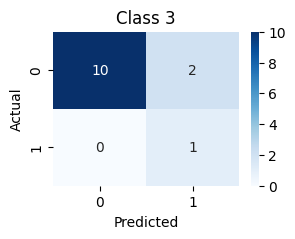

In [ ]:
cf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(3,2))
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Class 3')
plt.show()

# 0번 클래스 한개와 1번 클래스를 3번 클래스로 잘못 예측

# not 3으로 판단된 것을 1,2,6,7,8 분류기에 넣기

In [ ]:
not_3_index = [index for index, value in enumerate(Y_pred) if value == -1]
not_3_data = [test_list[index] for index in not_3_index]
not_3_data = pd.concat([not_3_data, delete_model], ignore_index=True)

## 1번 이상 전처리

In [ ]:
not_3_1 = not_3_data.copy()

In [ ]:
# Well data of label 1
df1 = pd.read_csv('/content/drive/MyDrive/geo/1/WELL-00001_20140124093303.csv')
df2 = pd.read_csv('/content/drive/MyDrive/geo/1/WELL-00002_20140126161944.csv')
df3 = pd.read_csv('/content/drive/MyDrive/geo/1/WELL-00006_20170731180930.csv')
df4 = pd.read_csv('/content/drive/MyDrive/geo/1/WELL-00006_20170731220432.csv')
df5 = pd.read_csv('/content/drive/MyDrive/geo/1/WELL-00006_20180617200257.csv')

# Normal data
dfn = pd.read_csv('/content/drive/MyDrive/geo/0/WELL-00001_20170218060218.csv')

In [ ]:
df_TPT1 = df1[['P-TPT', 'T-TPT', 'class']]

df_TPT_normal1 = df_TPT1[df_TPT1['class']==0.0]
df_TPT_change1 = df_TPT1[df_TPT1['class']==101]
df_TPT_anomaly1  = df_TPT1[df_TPT1['class']==1]

length_change = int(df_TPT_change1.shape[0] * 0.1)  # Changing Ratio of Normal & Abnormal

df_TPT_change1.iloc[:length_change, df_TPT_change1.columns.get_loc('class')] = 0

df_TPT_change1.iloc[length_change:, df_TPT_change1.columns.get_loc('class')] = 1

df_TPT_modified_1 = pd.concat([df_TPT_normal1, df_TPT_change1, df_TPT_anomaly1])

df_TPT_modified_1.reset_index(drop=True, inplace=True)


In [ ]:
df_TPT2 = df2[['P-TPT', 'T-TPT', 'class']]

df_TPT_normal2 = df_TPT2[df_TPT2['class'] == 0.0]
df_TPT_change2 = df_TPT2[df_TPT2['class'] == 101]
df_TPT_anomaly2 = df_TPT2[df_TPT2['class'] == 1]  # Replaced 1 with 2

length_change = int(df_TPT_change2.shape[0] * 0.1)  # Changing Length

df_TPT_change2.iloc[:length_change, df_TPT_change2.columns.get_loc('class')] = 0
df_TPT_change2.iloc[length_change:, df_TPT_change2.columns.get_loc('class')] = 1

df_TPT_modified_2 = pd.concat([df_TPT_normal2, df_TPT_change2, df_TPT_anomaly2])

df_TPT_modified_2.reset_index(drop=True, inplace=True)


In [ ]:
df_TPT3 = df3[['P-TPT', 'T-TPT', 'class']]

df_TPT_normal3 = df_TPT3[df_TPT3['class'] == 0.0]
df_TPT_change3 = df_TPT3[df_TPT3['class'] == 101]
df_TPT_anomaly3 = df_TPT3[df_TPT3['class'] == 1]  # Replaced 1 with 3

length_change = int(df_TPT_change3.shape[0] * 0.1)  # Changing Length

df_TPT_change3.iloc[:length_change, df_TPT_change3.columns.get_loc('class')] = 0
df_TPT_change3.iloc[length_change:, df_TPT_change3.columns.get_loc('class')] = 1

df_TPT_modified_3 = pd.concat([df_TPT_normal3, df_TPT_change3, df_TPT_anomaly3])

df_TPT_modified_3.reset_index(drop=True, inplace=True)


In [ ]:
df_TPT4 = df4[['P-TPT', 'T-TPT', 'class']]

df_TPT_normal4 = df_TPT4[df_TPT4['class'] == 0.0]
df_TPT_change4 = df_TPT4[df_TPT4['class'] == 101]
df_TPT_anomaly4 = df_TPT4[df_TPT4['class'] == 1]  # Replaced 1 with 4

length_change = int(df_TPT_change4.shape[0] * 0.1)  # Changing Length

df_TPT_change4.iloc[:length_change, df_TPT_change4.columns.get_loc('class')] = 0
df_TPT_change4.iloc[length_change:, df_TPT_change4.columns.get_loc('class')] = 1

df_TPT_modified_4 = pd.concat([df_TPT_normal4, df_TPT_change4, df_TPT_anomaly4])

df_TPT_modified_4.reset_index(drop=True, inplace=True)


In [ ]:
df_TPT5 = df5[['P-TPT', 'T-TPT', 'class']]

df_TPT_normal5 = df_TPT5[df_TPT5['class'] == 0.0]
df_TPT_change5 = df_TPT5[df_TPT5['class'] == 101]
df_TPT_anomaly5 = df_TPT5[df_TPT5['class'] == 1]  # Replaced 1 with 5

length_change = int(df_TPT_change5.shape[0] * 0.1)  # Changing Length

df_TPT_change5.iloc[:length_change, df_TPT_change5.columns.get_loc('class')] = 0
df_TPT_change5.iloc[length_change:, df_TPT_change5.columns.get_loc('class')] = 1

df_TPT_modified_5 = pd.concat([df_TPT_normal5, df_TPT_change5, df_TPT_anomaly5])

df_TPT_modified_5.reset_index(drop=True, inplace=True)


In [ ]:
df_TPTn = dfn[['P-TPT', 'T-TPT', 'class']]

df_TPT_normaln = df_TPTn[df_TPTn['class'] == 0.0]
df_TPT_changen = df_TPTn[df_TPTn['class'] == 101]
df_TPT_anomalyn = df_TPTn[df_TPTn['class'] == 1]

length_change = int(df_TPT_changen.shape[0] * 0.1)  # Changing Length

df_TPT_changen.iloc[:length_change, df_TPT_changen.columns.get_loc('class')] = 0
df_TPT_changen.iloc[length_change:, df_TPT_changen.columns.get_loc('class')] = 1

df_TPT_modified_n = pd.concat([df_TPT_normaln, df_TPT_changen, df_TPT_anomalyn])

df_TPT_modified_n.reset_index(drop=True, inplace=True)

In [ ]:
columns_to_scale = ['P-TPT', 'T-TPT']

scaler = MinMaxScaler()

# Apply StandardScaler to each DataFrame separately
scaled_df1 = df_TPT_modified_1.copy()
scaled_df1[columns_to_scale] = scaler.fit_transform(df_TPT_modified_1[columns_to_scale])

scaled_df2 = df_TPT_modified_2.copy()
scaled_df2[columns_to_scale] = scaler.fit_transform(df_TPT_modified_2[columns_to_scale])

scaled_df3 = df_TPT_modified_3.copy()
scaled_df3[columns_to_scale] = scaler.fit_transform(df_TPT_modified_3[columns_to_scale])

scaled_df4 = df_TPT_modified_4.copy()
scaled_df4[columns_to_scale] = scaler.fit_transform(df_TPT_modified_4[columns_to_scale])

scaled_df5 = df_TPT_modified_5.copy()
scaled_df5[columns_to_scale] = scaler.fit_transform(df_TPT_modified_5[columns_to_scale])

scaled_dfn = df_TPT_modified_n.copy()
scaled_dfn[columns_to_scale] = scaler.fit_transform(df_TPT_modified_n[columns_to_scale])

# Combine all the scaled_df
scaled_df_combined = pd.concat([scaled_df1, scaled_df2, scaled_df3, scaled_df4, scaled_df5, scaled_dfn], ignore_index=True)

# Separate features and target
X = scaled_df_combined[['P-TPT', 'T-TPT']]
y = scaled_df_combined['class']

In [ ]:
# Concatenate the scaled DataFrames
scaled_df_combined = pd.concat([scaled_df1, scaled_df2, scaled_df3, scaled_df4, scaled_df5, scaled_dfn], ignore_index=True)

# Separate features and target
X = scaled_df_combined[['P-TPT', 'T-TPT']]
y = scaled_df_combined['class']

In [ ]:
# Best hyperparameters obtained from grid search
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}

# Start measuring time
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

final_xgb_model = xgb.XGBClassifier(random_state=1, **best_params)

# Train the final XGBoost model
final_xgb_model.fit(X_train, y_train)

## 1번 이상 모델 탐지

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score

tdf0 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/conference/well3.csv') # Any data can be used for test
### tdf1 = pd.read_csv(~~~Choose any kind of data~~~~~)
### tdf2 ~~~~


not_3_data = pd.concat([tdf0, tdf2, tdf3, tdf6, tdf7, tdf8], ignore_index=True)

not_3_1 = not_3_data.copy()
df_test = not_3_1[['P-TPT', 'T-TPT', 'class']]

# Modify class column based on specific conditions
df_test['class'] = df_test['class'].apply(lambda x: 1 if 2 <= x <= 8 else (101 if 102 <= x <= 108 else x))

df_test_normal = df_test[df_test['class'] == 0.0]
df_test_change = df_test[df_test['class'] == 101]
df_test_anomaly = df_test[df_test['class'] == 1]

test_length_change = int(df_test_change.shape[0] * 0.1)

df_test_change.iloc[:test_length_change, df_test_change.columns.get_loc('class')] = 0
df_test_change.iloc[test_length_change:, df_test_change.columns.get_loc('class')] = 1

df_test_modified = pd.concat([df_test_normal, df_test_change, df_test_anomaly])
df_test_modified.reset_index(drop=True, inplace=True)

X_test = df_test_modified[['P-TPT', 'T-TPT']]

columns_to_scale = ['P-TPT', 'T-TPT']

scaler = MinMaxScaler()

scaled_test = X_test.copy()
scaled_test[columns_to_scale] = scaler.fit_transform(scaled_test[columns_to_scale])

# Make predictions on the test data
y_pred = final_xgb_model.predict(scaled_test)

# If the test data have class labels, then get the true class labels from the test data
y_true = df_test_modified['class']

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Count how many normal & abnormal data come out
num_normal = sum(y_pred == 0)
num_abnormal = sum(y_pred == 1)


print("Number of normal data points:", num_normal)
print("Number of abnormal data points:", num_abnormal)
print("Accuracy on test data:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
for i in range(len(not_3_1)):
    data = not_3_1[i]
    df_test = data[['P-TPT', 'T-TPT', 'class']]

    # Modify class column based on specific conditions
    df_test['class'] = df_test['class'].apply(lambda x: 1 if 2 <= x <= 8 else (101 if 102 <= x <= 108 else x))

    df_test_normal = df_test[df_test['class'] == 0.0]
    df_test_change = df_test[df_test['class'] == 101]
    df_test_anomaly = df_test[df_test['class'] == 1]

    test_length_change = int(df_test_change.shape[0] * 0.1)

    df_test_change.iloc[:test_length_change, df_test_change.columns.get_loc('class')] = 0
    df_test_change.iloc[test_length_change:, df_test_change.columns.get_loc('class')] = 1

    df_test_modified = pd.concat([df_test_normal, df_test_change, df_test_anomaly])
    df_test_modified.reset_index(drop=True, inplace=True)

    X_test = df_test_modified[['P-TPT', 'T-TPT']]

    columns_to_scale = ['P-TPT', 'T-TPT']

    scaler = MinMaxScaler()

    scaled_test = X_test.copy()
    scaled_test[columns_to_scale] = scaler.fit_transform(scaled_test[columns_to_scale])

y_pred  = final_xgb_model.predict(scaled_test)
y_true = df_test_modified['class']

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Count how many normal & abnormal data come out
num_normal = sum(y_pred == 0)
num_abnormal = sum(y_pred == 1)


print("Number of normal data points:", num_normal)
print("Number of abnormal data points:", num_abnormal)
print("Accuracy on test data:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

## 2번 이상 전처리

In [ ]:
folder_path = '/content/drive/MyDrive/geo/2/'
dataframes = []

for file_name in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file_name)
  df = pd.read_csv(file_path)
  dataframes.append(df)

df_2 = dataframes.copy()

whole_data = []
for i in range(len(df_2)):
  b = df_2[i]
  b = b.fillna(method='ffill') # 그외에 결측치가 있을 시 이전 값으로 대체
  b['class'] = b['class'].replace(102,0)
  b['timestamp'] = pd.to_datetime(b['timestamp'])
  b.set_index('timestamp', inplace=True)
  # 5초 간격으로 다운 샘플링
  b = b.resample('5S').first()
  b.reset_index(drop=True, inplace = True)
  X = b.drop('class', axis=1)
  y = b['class']
  # 스케일링을 한 이후에 다른 데이터 프레임과 합치기
  scaler = RobustScaler()
  b_robust = scaler.fit_transform(X)
  b_scale = pd.DataFrame(b_robust, columns=X.columns)
  b_scale['class'] = y
  whole_data.append(b_scale)

train_df_2 = pd.concat(whole_data, ignore_index=True)

In [ ]:
# 2,6,8 번 클래스에는 0번 정상 데이터를 같이 훈련 시키기
folder_path = '/content/drive/MyDrive/geo/0/'
dataframes = []

for file_name in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file_name)
  df = pd.read_csv(file_path)
  dataframes.append(df)

df_0 = dataframes.copy()

whole_data_0 = []
for i in range(len(df_0)):
  b = df_0[i]
  b = b.fillna(method='ffill') # 그외에 결측치가 있을 시 이전 값으로 대체
  b['timestamp'] = pd.to_datetime(b['timestamp'])
  b.set_index('timestamp', inplace=True)
  # 5초 간격으로 다운 샘플링
  b = b.resample('5S').first()
  b.reset_index(drop=True, inplace = True)
  X = b.drop('class', axis=1)
  y = b['class']
  # 스케일링을 한 이후에 다른 데이터 프레임과 합치기
  scaler = RobustScaler()
  b_robust = scaler.fit_transform(X)
  b_scale = pd.DataFrame(b_robust, columns=X.columns)
  b_scale['class'] = y
  whole_data_0.append(b_scale)

train_df_0 = pd.concat(whole_data_0, ignore_index=True)

In [ ]:
not_3_2 = not_3_data.copy()

In [ ]:
test_not_2 = []
for i in range(len(not_3_2)):
  b = not_3_2[i]
  b = b.fillna(method='ffill') # 그외에 결측치가 있을 시 이전 값으로 대체
  b['timestamp'] = pd.to_datetime(b['timestamp'])
  b.set_index('timestamp', inplace=True)
  # 5초 간격으로 다운 샘플링
  b = b.resample('5S').first()
  b.reset_index(drop=True, inplace = True)
  X = b.drop('class', axis=1)
  y = b['class']
  # 스케일링을 한 이후에 다른 데이터 프레임과 합치기
  scaler = RobustScaler()
  b_robust = scaler.fit_transform(X)
  b_scale = pd.DataFrame(b_robust, columns=X.columns)
  b_scale['class'] = y
  test_not_2.append(b_scale)

test_not_2 = pd.concat(test_not_2, ignore_index=True)

## 2번 이상 모델 탐지

In [ ]:
import lightgbm as lgb

result_df_2 = pd.concat([train_df_0, train_df_2], axis=0, ignore_index=True)

result_df_2 = result_df_2.dropna(subset=['class'])
test_df_2 = test_not_2.dropna(subset=['class'])

X_train_2 = result_df_2.drop('class', axis=1)
y_train_2 = result_df_2['class']
X_test_2 = test_df_2.drop('class', axis=1)

lgb = lgb.LGBMClassifier(force_row_wise=True)
lgb.fit(X_train_2, y_train_2)

y_pred_2 = lgb.predict(X_test_2)
print(np.unique(y_pred_2, return_counts = True))

[LightGBM] [Info] Number of positive: 61909, number of negative: 1929426
[LightGBM] [Info] Total Bins 1697
[LightGBM] [Info] Number of data points in the train set: 1991335, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031089 -> initscore=-3.439312
[LightGBM] [Info] Start training from score -3.439312
(array([0.]), array([39353]))


## 6번 이상 전처리

In [ ]:
folder_path = '/content/drive/MyDrive/geo/6/'
dataframes = []

for file_name in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file_name)
  df = pd.read_csv(file_path)
  dataframes.append(df)

df_6 = dataframes.copy()

whole_data_6 = []
for i in range(len(df_6)):
  b = df_6[i]
  b = b.fillna(method='ffill') # 그외에 결측치가 있을 시 이전 값으로 대체
  b['class'] = b['class'].replace(106,0)
  b['timestamp'] = pd.to_datetime(b['timestamp'])
  b.set_index('timestamp', inplace=True)
  # 5초 간격으로 다운 샘플링
  b = b.resample('5S').first()
  b.reset_index(drop=True, inplace = True)
  X = b.drop('class', axis=1)
  y = b['class']
  # 스케일링을 한 이후에 다른 데이터 프레임과 합치기
  scaler = RobustScaler()
  b_robust = scaler.fit_transform(X)
  b_scale = pd.DataFrame(b_robust, columns=X.columns)
  b_scale['class'] = y
  whole_data_6.append(b_scale)

# well data 3개를 test로 구분
train_df_6 = pd.concat(whole_data_6, ignore_index=True)


## 6번 이상 모델 탐지

In [ ]:
not_3_6 = not_3_data.copy()

test_not_6 = []
for i in range(len(not_3_6)):
  b = not_3_6[i]
  b = b.fillna(method='ffill') # 그외에 결측치가 있을 시 이전 값으로 대체
  b['timestamp'] = pd.to_datetime(b['timestamp'])
  b.set_index('timestamp', inplace=True)
  # 5초 간격으로 다운 샘플링
  b = b.resample('5S').first()
  b.reset_index(drop=True, inplace = True)
  X = b.drop('class', axis=1)
  y = b['class']
  # 스케일링을 한 이후에 다른 데이터 프레임과 합치기
  scaler = RobustScaler()
  b_robust = scaler.fit_transform(X)
  b_scale = pd.DataFrame(b_robust, columns=X.columns)
  b_scale['class'] = y
  test_not_6.append(b_scale)

test_not_6 = pd.concat(test_not_6, ignore_index=True)

In [ ]:
import lightgbm as lgb
result_df_6 = pd.concat([train_df_0, train_df_6], axis=0, ignore_index=True)

result_df_6 = result_df_6.dropna(subset=['class'])
test_df_6 = test_not_6.dropna(subset=['class'])


X_train_6 = result_df_6.drop('class', axis=1)
y_train_6 = result_df_6['class']
X_test_6 = test_df_6.drop('class', axis=1)

lgb = lgb.LGBMClassifier(force_row_wise=True)

lgb.fit(X_train_6, y_train_6)

y_pred_6 = lgb.predict(X_test_6)
print(np.unique(y_pred_6, return_counts = True))

[LightGBM] [Info] Number of positive: 775746, number of negative: 2284985
[LightGBM] [Info] Total Bins 1593
[LightGBM] [Info] Number of data points in the train set: 3060731, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.253451 -> initscore=-1.080290
[LightGBM] [Info] Start training from score -1.080290
(array([0.]), array([39353]))


## 7번 이상 전처리

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/geo/7/WELL-00018_20190403023307.csv")
df2 = pd.read_csv("/content/drive/MyDrive/geo/7/WELL-00018_20180611021218.csv")
df3 = pd.read_csv("/content/drive/MyDrive/geo/7/WELL-00006_20180620155728.csv")
df4 = pd.read_csv("/content/drive/MyDrive/geo/7/WELL-00006_20180617181315.csv")
df5 = pd.read_csv("/content/drive/MyDrive/geo/7/WELL-00001_20170226140146.csv")

dfs = [df1, df2, df3, df4, df5]


# 반복문을 사용하여 각 데이터프레임에 작업 수행
for idx, df in enumerate(dfs, start=1):
    b_0 = df[df['class'] == 0].shape[0]
    b_7 = df[df['class'] == 7].shape[0]
    b_107 = df[df['class'] == 107].shape[0]
    # class가 0과 7인 비율 계산
    ratio_0 = b_0 / (b_0 + b_7)
    ratio_7 = b_7 / (b_0 + b_7)
    df['class'][b_0:b_0 + int(b_107*ratio_0)] = 0
    df['class'][b_0 + int(b_107*ratio_0):] = 7

In [ ]:
# concat() 함수를 사용하여 데이터프레임을 하나로 합치기
merged_df = pd.concat(dfs)

# T-JUS-CKGL 열은 모두가 결측값이라서 삭제함.
merged_df = merged_df.drop('T-JUS-CKGL', axis = 1)

# P-PDG, QGL 열이 모든 값이 0이기 때문에 삭제함.
merged_df = merged_df.drop('P-PDG', axis = 1)
merged_df = merged_df.drop('QGL', axis = 1)

# 데이터 46만개이기 때문에 결측치 있는 것들 제거해줘도 크게 차이 없을 거 같다고 판단해서 제거.

merged_df = merged_df.dropna()

In [ ]:
# 데이터프레임에서 클래스 컬럼을 제거하고, 이상 탐지 대상 데이터로 사용
X = merged_df.drop(['timestamp', 'class'], axis=1)
y = merged_df['class']

# 데이터 전처리: 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


sgd_params = {'alpha': 0.0001, 'l1_ratio': 0.25, 'loss': 'hinge', 'penalty': 'elasticnet'}

# SGDClassifier로 이상 탐지 모델 구축
svm_model = SGDClassifier(**sgd_params)  # loss='hinge'는 선형 SVM 모델을 사용함
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
# 이상치(예측 결과가 -1)인 데이터를 원래 데이터와 비교하기 위해 7로
y_pred[y_pred == -1] = 7
y_pred[y_pred == 1] = 0

# F1 스코어 계산
f1 = f1_score(y_test, y_pred, average='macro')

SGDClassifier(l1_ratio=0.25, penalty='elasticnet')

## 7번 이상 모델 탐지

In [ ]:
not_3_7 = not_3_data.copy()

# concat() 함수를 사용하여 데이터프레임을 하나로 합치기
not_3_7 = pd.concat(not_3_7)

not_3_7 = not_3_7.drop('T-JUS-CKGL', axis = 1)
not_3_7 = not_3_7.drop('P-PDG', axis = 1)
not_3_7 = not_3_7.drop('QGL', axis = 1)
not_3_7 = not_3_7.dropna()

In [ ]:
X_test = not_3_7.drop(['timestamp', 'class'], axis=1)

# 데이터 전처리: 데이터 스케일링
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# not_3에 대해서 이상 탐지
y_pred_7 = svm_model.predict(X_test)
print(np.unique(y_pred_7, return_counts = True))

(array([0., 7.]), array([145930,  50454]))


In [ ]:
not_3_7 = not_3_data.copy()

for i in not_3_7:
  i = i.drop('T-JUS-CKGL', axis = 1)
  i = i.drop('P-PDG', axis = 1)
  i = i.drop('QGL', axis = 1)
  i = i.dropna()
  X_test = i.drop(['timestamp', 'class'], axis=1)
  X_test = scaler.fit_transform(X_test)
  y_pred_7 = svm_model.predict(X_test)
  print(np.unique(y_pred_7, return_counts = True))

## 8번 이상 전처리

In [ ]:

folder_path = '/content/drive/MyDrive/geo/8/'
dataframes = []

for file_name in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file_name)
  df = pd.read_csv(file_path)
  dataframes.append(df)

df_8 = dataframes.copy()

whole_data_8 = []
for i in range(len(df_8)):
  b = df_8[i]
  b = b.fillna(method='ffill') # 그외에 결측치가 있을 시 이전 값으로 대체
  b['class'] = b['class'].replace(108,0)
  b['timestamp'] = pd.to_datetime(b['timestamp'])
  b.set_index('timestamp', inplace=True)
  # 5초 간격으로 다운 샘플링
  b = b.resample('5S').first()
  b.reset_index(drop=True, inplace = True)
  X = b.drop('class', axis=1)
  y = b['class']
  # 스케일링을 한 이후에 다른 데이터 프레임과 합치기
  scaler = StandardScaler()
  b_robust = scaler.fit_transform(X)
  b_scale = pd.DataFrame(b_robust, columns=X.columns)
  b_scale['class'] = y
  whole_data_8.append(b_scale)

train_df_8 = pd.concat(whole_data_8, ignore_index=True)

## 8번 이상 모델 탐지

In [ ]:
not_3_8 = not_3_data.copy()

test_not_8 = []
for i in range(len(not_3_8)):
  b = not_3_8[i]
  b = b.fillna(method='ffill') # 그외에 결측치가 있을 시 이전 값으로 대체
  b['timestamp'] = pd.to_datetime(b['timestamp'])
  b.set_index('timestamp', inplace=True)
  # 5초 간격으로 다운 샘플링
  b = b.resample('5S').first()
  b.reset_index(drop=True, inplace = True)
  X = b.drop('class', axis=1)
  y = b['class']
  # 스케일링을 한 이후에 다른 데이터 프레임과 합치기
  scaler = RobustScaler()
  b_robust = scaler.fit_transform(X)
  b_scale = pd.DataFrame(b_robust, columns=X.columns)
  b_scale['class'] = y
  test_not_8.append(b_scale)

test_not_8 = pd.concat(test_not_8, ignore_index=True)

In [ ]:
import lightgbm as lgb

result_df_8 = pd.concat([train_df_0, train_df_8], axis=0, ignore_index=True)

result_df_8 = result_df_8.dropna(subset=['class'])
test_df_8 = test_not_8.dropna(subset=['class'])

X_train_8 = result_df_8.drop('class', axis=1)
y_train_8 = result_df_8['class']
X_test_8 = test_df_8.drop('class', axis=1)

lgb = lgb.LGBMClassifier(force_row_wise=True)
lgb.fit(X_train_8, y_train_8)

y_pred_8 = lgb.predict(X_test_8)
print(np.unique(y_pred_8, return_counts = True))

[LightGBM] [Info] Number of positive: 120628, number of negative: 2205179
[LightGBM] [Info] Total Bins 1618
[LightGBM] [Info] Number of data points in the train set: 2325807, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.051865 -> initscore=-2.905853
[LightGBM] [Info] Start training from score -2.905853
(array([0.]), array([39353]))
